<a href="https://colab.research.google.com/github/aadityadamle/NLP-Course/blob/main/Vectorization_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vectorization Techniques

NLTK Setup

In [ ]:
import nltk
nltk.download("book")

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

True

1. Bag of Words

In [ ]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [ ]:
# Import hamlet corpus 
hamlet = nltk.corpus.gutenberg.sents("shakespeare-hamlet.txt")
len(hamlet)

3106

Consider first 20 lines of text as entire corpus.

In [ ]:
hamlet[:20]

[['[',
  'The',
  'Tragedie',
  'of',
  'Hamlet',
  'by',
  'William',
  'Shakespeare',
  '1599',
  ']'],
 ['Actus', 'Primus', '.'],
 ['Scoena', 'Prima', '.'],
 ['Enter', 'Barnardo', 'and', 'Francisco', 'two', 'Centinels', '.'],
 ['Barnardo', '.'],
 ['Who', "'", 's', 'there', '?'],
 ['Fran', '.'],
 ['Nay', 'answer', 'me', ':', 'Stand', '&', 'vnfold', 'your', 'selfe'],
 ['Bar', '.'],
 ['Long', 'liue', 'the', 'King'],
 ['Fran', '.'],
 ['Barnardo', '?'],
 ['Bar', '.'],
 ['He'],
 ['Fran', '.'],
 ['You', 'come', 'most', 'carefully', 'vpon', 'your', 'houre'],
 ['Bar', '.'],
 ["'",
  'Tis',
  'now',
  'strook',
  'twelue',
  ',',
  'get',
  'thee',
  'to',
  'bed',
  'Francisco'],
 ['Fran', '.'],
 ['For',
  'this',
  'releefe',
  'much',
  'thankes',
  ':',
  "'",
  'Tis',
  'bitter',
  'cold',
  ',',
  'And',
  'I',
  'am',
  'sicke',
  'at',
  'heart']]

List of unique words in first 20 lines of hamlet excluding punctuations

In [ ]:
data = []
for line in hamlet[:20]:
  for word in line:
    if word.isalnum() and word not in data:
      data.append(word)
print(data)
len(data)

['The', 'Tragedie', 'of', 'Hamlet', 'by', 'William', 'Shakespeare', '1599', 'Actus', 'Primus', 'Scoena', 'Prima', 'Enter', 'Barnardo', 'and', 'Francisco', 'two', 'Centinels', 'Who', 's', 'there', 'Fran', 'Nay', 'answer', 'me', 'Stand', 'vnfold', 'your', 'selfe', 'Bar', 'Long', 'liue', 'the', 'King', 'He', 'You', 'come', 'most', 'carefully', 'vpon', 'houre', 'Tis', 'now', 'strook', 'twelue', 'get', 'thee', 'to', 'bed', 'For', 'this', 'releefe', 'much', 'thankes', 'bitter', 'cold', 'And', 'I', 'am', 'sicke', 'at', 'heart']


62

So the dictionary contains 62 words. Now select from above, any 5 sentence, prepare list of words in every sentence and check it with the dictionary. Create binary vectors corresponding to every sentence concatinating 1 if the word from dictionary is present in the sentence and 0 otherwise. 

So for the sentence "Enter Barnado and Francisco two Centinels." the picure below illustrates the formation of vector.

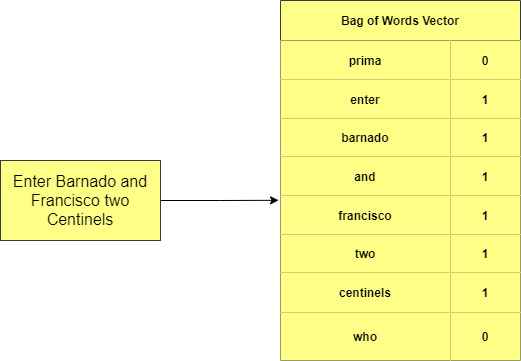

In [ ]:
sent1 = hamlet[3]
print(sent1)
vect1 = []
for word in data:
  if word in sent1:
    vect1.append(1)
  else:
    vect1.append(0)
print(vect1)

['Enter', 'Barnardo', 'and', 'Francisco', 'two', 'Centinels', '.']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Make a function to use for multiple sentences easily. Arguments should be sentence and dictnary, both of list type. 

In [ ]:
def wordToBinary(sentence, dictionary):
  print(sentence)
  vector = []
  for word in dictionary:
    if word in sentence:
      vector.append(1)
    else:
      vector.append(0)
  return vector

We have built the fuction. Now let's test it using sentences from our corpus.  

In [ ]:
sent2 = hamlet[7]
vect2 = wordToBinary(sent2, data)
print(vect2)

['Nay', 'answer', 'me', ':', 'Stand', '&', 'vnfold', 'your', 'selfe']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Now make 3 more vectors using same technique.

In [ ]:
vect3 = wordToBinary(hamlet[15],data)
print(vect3)
vect4 = wordToBinary(hamlet[17],data)
print(vect4)
vect5 = wordToBinary(hamlet[19],data)
print(vect5)

['You', 'come', 'most', 'carefully', 'vpon', 'your', 'houre']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
["'", 'Tis', 'now', 'strook', 'twelue', ',', 'get', 'thee', 'to', 'bed', 'Francisco']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['For', 'this', 'releefe', 'much', 'thankes', ':', "'", 'Tis', 'bitter', 'cold', ',', 'And', 'I', 'am', 'sicke', 'at', 'heart']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Now these 5 sentences are ready to insert in a machine learning model for training. As you can see in the results that the sentences including punctuations and symbols are also encoded successfully but as our dictionary is alphanumeric only, the symbols are ignored. 

The Scikit-Learn library provides this functionality with in their built-in CountVectorizer. I will show how easy it is to use it in this scenario.

In [ ]:
# Import CountVectorizer from Scikit - learn
from sklearn.feature_extraction.text import CountVectorizer

# Create a vectorizer object
vectorizer = CountVectorizer()

We need not provide the sentences in the form of lists of words. The vectorizer can handle entire sentence as a string. Hence I have converted the above lists into strings using the join function. 

In [ ]:
# Create a list of five sentences
sents = []
sents.append(" ".join(hamlet[3]))
sents.append(" ".join(hamlet[7]))
sents.append(" ".join(hamlet[15]))
sents.append(" ".join(hamlet[17]))
sents.append(" ".join(hamlet[19]))
sents

['Enter Barnardo and Francisco two Centinels .',
 'Nay answer me : Stand & vnfold your selfe',
 'You come most carefully vpon your houre',
 "' Tis now strook twelue , get thee to bed Francisco",
 "For this releefe much thankes : ' Tis bitter cold , And I am sicke at heart"]

The fit_transform function is used to vectorize the sentences. The function performs two operations. First it reads all the sentences and generates the vocablary and then it converts all the senetences to vectors according to the vocabulary.

In [ ]:
# Apply fit_transform function of the vectorizer object to the sentence list
X = vectorizer.fit_transform(sents) 

The get_feature_names function returns the vocabulary generated by fitting the vectorizer over the list of sentences.

In [ ]:
# Print the vocabulary and no. of words
print(vectorizer.get_feature_names())
print(len(vectorizer.get_feature_names()))

['am', 'and', 'answer', 'at', 'barnardo', 'bed', 'bitter', 'carefully', 'centinels', 'cold', 'come', 'enter', 'for', 'francisco', 'get', 'heart', 'houre', 'me', 'most', 'much', 'nay', 'now', 'releefe', 'selfe', 'sicke', 'stand', 'strook', 'thankes', 'thee', 'this', 'tis', 'to', 'twelue', 'two', 'vnfold', 'vpon', 'you', 'your']
38


The generated vector are stored in variable X and can be viewed as arrays of 1s and 0s.


In [ ]:
# View the vectors
X.toarray()

array([[0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]])

As you can see in the output the sentences are represented as  arrays of length 38. In this way within only few steps we can achieve vectorized texts using CountVectorizer. 

The main disadvantage of this approach is the dimensions of the vector increase with the dictionary length. You can easily imagine if just 20 lines from a book contain 62 words then a whole book would make up to huge  vector dimensions. Plus we only discern the presence of words and not the importance which can be calculated by counting word occurences. We will shift our focus to methods that solve these problems.

2. TF-IDF



Tf is the Term frequency which means how many times a particular word has occurred in the document and idf is inverse document frequency which basically removes the words which are very common in all the documents. At the end, we acquire the words which are more important in the document.

I will use only five sentences in my example as we used in the bag of words model. 



The TF value refers to term frequency and can be calculated as follows:

TF = (Frequency of the word in the sentence) / (Total number of words in the sentence)

For instance, look at the first word of the third sentence "You". Its term frequency will be 0.14 since the word "Enter" occurs only once in the sentence and the total number of words in the sentence are 7, hence, 1/7 = 0.14.

IDF refers to inverse document frequency and can be calculated as follows:

IDF: (Total number of sentences (documents))/(Number of sentences (documents) containing the word)

For instance the word "You" occurs in only one of five sentences, therefore the IDF value of the word "You" is 1/5 = 0.20.

It is important to mention that the IDF value for a word remains the same throughout all the documents as it depends upon the total number of documents. On the other hand, TF values of a word differ from document to document.

First let's see our corpus

In [ ]:
sents

['Enter Barnardo and Francisco two Centinels .',
 'Nay answer me : Stand & vnfold your selfe',
 'You come most carefully vpon your houre',
 "' Tis now strook twelue , get thee to bed Francisco",
 "For this releefe much thankes : ' Tis bitter cold , And I am sicke at heart"]

To begin with, remove punctuations and convert the text to lowercase.

In [ ]:
import re

for i in range(len(sents)):
    sents [i] = sents [i].lower()
    sents [i] = re.sub(r'\W',' ',sents [i])

sents    

['enter barnardo and francisco two centinels  ',
 'nay answer me   stand   vnfold your selfe',
 'you come most carefully vpon your houre',
 '  tis now strook twelue   get thee to bed francisco',
 'for this releefe much thankes     tis bitter cold   and i am sicke at heart']

The next step is to tokenize the text.

In [ ]:
sent_tokens = []
for sent in sents:
  tokens = nltk.word_tokenize(sent) 
  sent_tokens.append(tokens)

sent_tokens

[['enter', 'barnardo', 'and', 'francisco', 'two', 'centinels'],
 ['nay', 'answer', 'me', 'stand', 'vnfold', 'your', 'selfe'],
 ['you', 'come', 'most', 'carefully', 'vpon', 'your', 'houre'],
 ['tis', 'now', 'strook', 'twelue', 'get', 'thee', 'to', 'bed', 'francisco'],
 ['for',
  'this',
  'releefe',
  'much',
  'thankes',
  'tis',
  'bitter',
  'cold',
  'and',
  'i',
  'am',
  'sicke',
  'at',
  'heart']]

Then create a dictionary of word frequencies of all the words in the five sentences.

In [ ]:
#Create a dictioary of word frequencies
wordfreq = {}
for sentence in sent_tokens:
  for word in sentence:
    if word not in wordfreq.keys():
      wordfreq[word] = 1
    else:
      wordfreq[word] += 1

wordfreq

{'am': 1,
 'and': 2,
 'answer': 1,
 'at': 1,
 'barnardo': 1,
 'bed': 1,
 'bitter': 1,
 'carefully': 1,
 'centinels': 1,
 'cold': 1,
 'come': 1,
 'enter': 1,
 'for': 1,
 'francisco': 2,
 'get': 1,
 'heart': 1,
 'houre': 1,
 'i': 1,
 'me': 1,
 'most': 1,
 'much': 1,
 'nay': 1,
 'now': 1,
 'releefe': 1,
 'selfe': 1,
 'sicke': 1,
 'stand': 1,
 'strook': 1,
 'thankes': 1,
 'thee': 1,
 'this': 1,
 'tis': 2,
 'to': 1,
 'twelue': 1,
 'two': 1,
 'vnfold': 1,
 'vpon': 1,
 'you': 1,
 'your': 2}

Sort the dictionary of word frequencies in decsending order of the frequency. This will give a dictionary with the most frequent words at the top.  

In [ ]:
sort_wordfreq = sorted(wordfreq.items(), 
                       key = lambda kv:(kv[1], kv[0]),
                       reverse = True)
sort_wordfreq

[('your', 2),
 ('tis', 2),
 ('francisco', 2),
 ('and', 2),
 ('you', 1),
 ('vpon', 1),
 ('vnfold', 1),
 ('two', 1),
 ('twelue', 1),
 ('to', 1),
 ('this', 1),
 ('thee', 1),
 ('thankes', 1),
 ('strook', 1),
 ('stand', 1),
 ('sicke', 1),
 ('selfe', 1),
 ('releefe', 1),
 ('now', 1),
 ('nay', 1),
 ('much', 1),
 ('most', 1),
 ('me', 1),
 ('i', 1),
 ('houre', 1),
 ('heart', 1),
 ('get', 1),
 ('for', 1),
 ('enter', 1),
 ('come', 1),
 ('cold', 1),
 ('centinels', 1),
 ('carefully', 1),
 ('bitter', 1),
 ('bed', 1),
 ('barnardo', 1),
 ('at', 1),
 ('answer', 1),
 ('am', 1)]

Note that vectorization is a tecnique of representing sentences as vectors and thus the vectors may not contain all the words. The word that are important or most frequent are considered. Thus, we represent sentences only with the selected words.

Following illustrates the selection of most frequent words. 


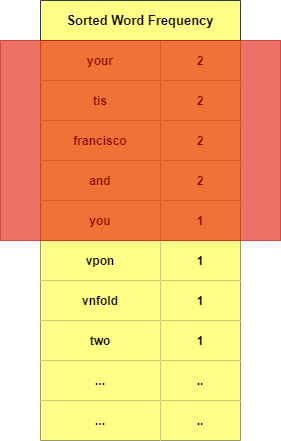

Select the most frequent words in the dictionary with which the sentences will be represented. Since I have considered only five sentences, I am only considering very few words. It should depend on the size of sentence or vocabulary that is used. 


In [ ]:
most_freq = []
for word in sort_wordfreq[:5]:
  most_freq.append(word[0])
most_freq

['your', 'tis', 'francisco', 'and', 'you']

Now find the idf values of the most frequent words. As mentioned at the beginning the formula for finding idf value is (Total number of sentences (document))/(Number of sentences (document) containing the word)

The following illustrates calculation of IDF values.

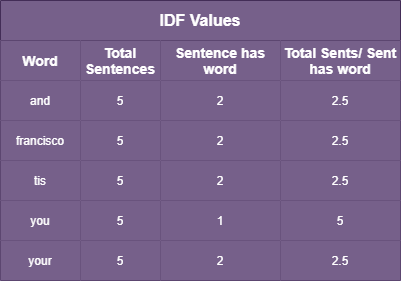

In [ ]:
import numpy as np

word_idf_values = {}
for token in most_freq:
  sent_has_word = 0
  for sent in sent_tokens:
    if token in sent:
      sent_has_word += 1
  word_idf_values[token] = np.log(len(sents)/(1 + sent_has_word))

word_idf_values

{'and': 0.5108256237659907,
 'francisco': 0.5108256237659907,
 'tis': 0.5108256237659907,
 'you': 0.9162907318741551,
 'your': 0.5108256237659907}

The IDF values are different from that in table because I used np.log function which gives good vectorization result. 

The next step is to create the TF dictionary for each word. As seen in the introduction, the formula to claculate tf value is (Frequency of the word in the sentence) / (Total number of words in the sentence)

The following illustrates calculation of TF values.

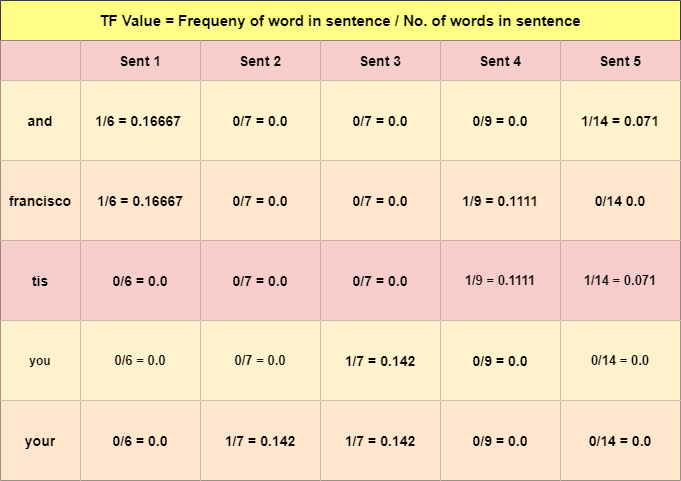

In [ ]:
word_tf_values = {}
for token in most_freq:
  sent_tf_vector = []
  for sent in sent_tokens:
    doc_freq = 0
    for word in sent:
      if token == word:
        doc_freq += 1
    word_tf = doc_freq/len(sent)
    sent_tf_vector.append(word_tf)  
  word_tf_values[token] = sent_tf_vector

word_tf_values

{'and': [0.16666666666666666, 0.0, 0.0, 0.0, 0.07142857142857142],
 'francisco': [0.16666666666666666, 0.0, 0.0, 0.1111111111111111, 0.0],
 'tis': [0.0, 0.0, 0.0, 0.1111111111111111, 0.07142857142857142],
 'you': [0.0, 0.0, 0.14285714285714285, 0.0, 0.0],
 'your': [0.0, 0.14285714285714285, 0.14285714285714285, 0.0, 0.0]}

The above code gives a dictionary in which keys are the 5 most frequent words and the value is the vector containing 5 tf values of that particular word in the 5 sentences of our corpus.

Now we have IDF values of all the words, along with TF values of every word across the sentences. The next step is to simply multiply IDF values with TF values.

In [ ]:
tfidf_values = []
for token in word_tf_values.keys():
    tfidf_sentences = []
    for tf_sentence in word_tf_values[token]:
        tf_idf_score = tf_sentence * word_idf_values[token]
        tfidf_sentences.append(tf_idf_score)
    tfidf_values.append(tfidf_sentences)

tfidf_values

[[0.0, 0.07297508910942724, 0.07297508910942724, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.05675840264066563, 0.03648754455471362],
 [0.08513760396099845, 0.0, 0.0, 0.05675840264066563, 0.0],
 [0.08513760396099845, 0.0, 0.0, 0.0, 0.03648754455471362],
 [0.0, 0.0, 0.13089867598202215, 0.0, 0.0]]

Using the above code we have acquired the list of lists of tfidf values for 5 most frequent words. The outer list represents our corpus containing inner list representing the sentences in the corpus.

Now we convert these list into a numpy array.

In [ ]:
tf_idf_model = np.asarray(tfidf_values)
tf_idf_model

array([[0.        , 0.07297509, 0.07297509, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.0567584 , 0.03648754],
       [0.0851376 , 0.        , 0.        , 0.0567584 , 0.        ],
       [0.0851376 , 0.        , 0.        , 0.        , 0.03648754],
       [0.        , 0.        , 0.13089868, 0.        , 0.        ]])

Our final goal is to vectorize sentences. Notice that we want the tfidf values according to the sentences and not according the particular words.

Thus we need to perform a transpose operation on this matrix to get final sentences.

In [ ]:
tf_idf_model = np.transpose(tf_idf_model)
tf_idf_model

array([[0.        , 0.        , 0.0851376 , 0.0851376 , 0.        ],
       [0.07297509, 0.        , 0.        , 0.        , 0.        ],
       [0.07297509, 0.        , 0.        , 0.        , 0.13089868],
       [0.        , 0.0567584 , 0.0567584 , 0.        , 0.        ],
       [0.        , 0.03648754, 0.        , 0.03648754, 0.        ]])

Now the first row represents the first sentence "Enter Barnardo and Francisco two Centinels" and we get tfidf values for the words "and" and "francisco" which are most common.  

The Scikit-Learn library provides this functionality with in their built-in TfidfVectorizer. I will show how easy it is to use it in this scenario.

In [ ]:
# Import TfidfVectorizer from Scikit - learn
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a vectorizer object
vectorizer = TfidfVectorizer()

Just like in CountVectorizer, the fit_transform function is used to vectorize the sentences. First it reads all the sentences and generates the vocablary. Then it converts all the senetences to vectors containing tfidf values .

In [ ]:
# Apply fit_transform function of the vectorizer object to the sentence list
X = vectorizer.fit_transform(sents) 

The get_feature_names function returns the vocabulary generated by fitting the vectorizer over the list of sentences.

In [ ]:
# Print the vocabulary and no. of words
print(vectorizer.get_feature_names())
print(len(vectorizer.get_feature_names()))

['am', 'and', 'answer', 'at', 'barnardo', 'bed', 'bitter', 'carefully', 'centinels', 'cold', 'come', 'enter', 'for', 'francisco', 'get', 'heart', 'houre', 'me', 'most', 'much', 'nay', 'now', 'releefe', 'selfe', 'sicke', 'stand', 'strook', 'thankes', 'thee', 'this', 'tis', 'to', 'twelue', 'two', 'vnfold', 'vpon', 'you', 'your']
38


The generated vector are stored in variable X and can be viewed as arrays containing the tfidf values.

In [ ]:
# View the vectors
X.toarray()

array([[0.        , 0.35038823, 0.        , 0.        , 0.43429718,
        0.        , 0.        , 0.        , 0.43429718, 0.        ,
        0.        , 0.43429718, 0.        , 0.35038823, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.43429718, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.38775666, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.38775666, 0.        , 0.        ,
        0.38775666, 0.        , 0.        , 0.38775666, 0.        ,
        0.38775666, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.38775666,
   

Here the vectorizer has considered all the words to calculate tfidf values and thus you will see 5 lists containing 38 values.

#References:
Bag of Words : https://machinelearningmastery.com/gentle-introduction-bag-words-model/

Tfidf : https://stackabuse.com/python-for-nlp-creating-tf-idf-model-from-scratch/